In [4]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [5]:
%matplotlib inline

Axes(0.125,0.125;0.775x0.775)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


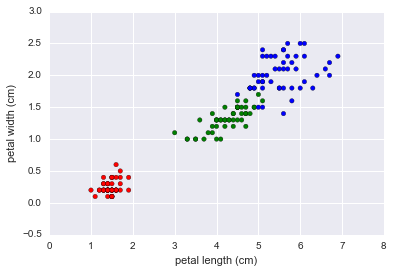

In [7]:
# datasets contains a bunch of standard datasets loaded directly into sklearn
# check data dictionary in http://archive.ics.uci.edu/ml/datasets/Iris
iris = datasets.load_iris()
# convert to dataframe with column names
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
# predictor variable is target
irisdf['target'] = iris.target
# give a color to each class in target, 0 is red, etc.
cmap = {'0': 'r', '1': 'g', '2': 'b' }
# What do the lines below do ? Insert explaination :
def lookup_color(x):
    return cmap[str(x)]
irisdf['ctarget'] = irisdf.target.apply(lookup_color)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

### Plot a similar plot with petal length and sepal width. Try out other combinations to see what makes each flower type unique

In [8]:
# plot answer goes here


In [9]:
# What does this code do?
irisdf['predictions'] = predictions
print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


#### How well did our poor man's predictor work? What is this metric called?

hint : refer to https://en.wikipedia.org/wiki/Precision_and_recall


### Starter Code

Work on improving the classifier below.

In [14]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)
irisdf['predictions'] = predictions

# Evaluate your predictions using this metric
print len(irisdf[irisdf.target == irisdf.predictions])*1.0 / len(irisdf)

0.666666666667


### Using distance: KNN implementation

In [15]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()

# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(irisdf[['petal length (cm)','petal width (cm)']], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


In [16]:
y = [cmap[str(x)] for x in knn.predict(iris.data[:,2:])]

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


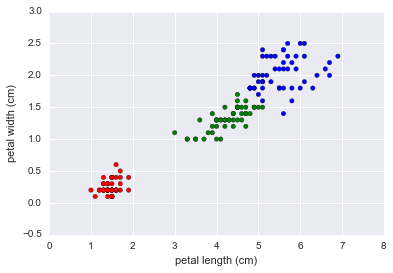

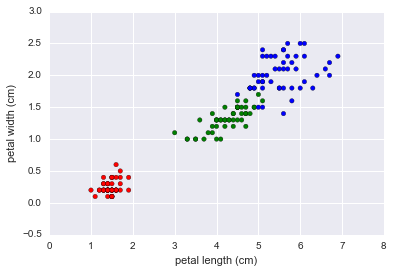

In [17]:
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=y)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)


Do we see a change in performance when using the distance weight?

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


### Try using different distance measures such as Manhattan? Tip: Check out http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [19]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?

params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11],'weights':['uniform','distance'],'metric':['euclidean','minkowski']}
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(n_jobs=-1,
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=10,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

/Users/srikanajan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/srikanajan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'metric': 'euclidean', 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'metric': 'euclidean', 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'metric': 'euclidean', 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'metric': 'euclidean', 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'metric': 'euclidean', 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'metric': 'euclidean', 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'metric': 'e

In [20]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')